# Workshop 3: Advanced Techniques

In this workshop we will learn techniques to increase the performance of CNN and how to use state of the art architectures. The structure of the workshop will be the following:



1.   Dropout
2.   Batch Normalization
3.   Data Augmentation
4.   Transfer learning



## 1. Dropout

In [1]:
# Import dependence for downloading CIFAR10
from tensorflow import keras
from keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_testval, y_testval) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
# Import dependence for handling arrays
import numpy as np

In [4]:
# Change the range of pixels from [0 255] to [0 1]
X_train_fl = X_train.astype('float32')
X_testval_fl = X_testval.astype('float32')
X_train_fl /= 255
X_testval_fl /= 255

In [5]:
# Import dependence for one-hot encoding
from sklearn.preprocessing import OneHotEncoder

In [6]:
# One-hot encoding of labels
onehot_enc = OneHotEncoder()
y_train_oh = onehot_enc.fit_transform(y_train.reshape(X_train.shape[0], 1)).toarray()
y_testval_oh = onehot_enc.fit_transform(y_testval.reshape(X_testval.shape[0], 1)).toarray()

In [7]:
# Show one-hot encoded labels shape
print("Training one-hot encoded labels shape:", y_train_oh.shape)
print("Testing one-hot encoded labels shape:", y_testval_oh.shape)

Training one-hot encoded labels shape: (50000, 10)
Testing one-hot encoded labels shape: (10000, 10)


In [8]:
# Divide testval in test and validation partitions
samples_test_nb = int(X_testval.shape[0]/2)
X_val = X_testval_fl[:samples_test_nb]
y_val = y_testval_oh[:samples_test_nb]
X_test = X_testval_fl[samples_test_nb:]
y_test = y_testval_oh[samples_test_nb:]

In [9]:
# Show shapes of test and validation partitions
print("Validation matrix shape:", X_val.shape)
print("Testing matrix shape:", X_test.shape)

Validation matrix shape: (5000, 32, 32, 3)
Testing matrix shape: (5000, 32, 32, 3)


In [10]:
# Import depence for CNN
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [11]:
# Define the model
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2], X_train.shape[3]))
conv_layer_1 = Conv2D(filters=8, kernel_size=(3, 3), activation='relu')(input_layer)
maxpool_layer_1 = MaxPool2D(pool_size=(2, 2))(conv_layer_1)
conv_layer_2 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(maxpool_layer_1)
maxpool_layer_2 = MaxPool2D(pool_size=(2, 2))(conv_layer_2)
conv_layer_3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(maxpool_layer_2)
flatten_layer = Flatten()(conv_layer_3)
dense_layer = Dense(128, activation='relu')(flatten_layer)
dropout = Dropout(rate=0.4)(dense_layer)
output_layer = Dense(10, activation='softmax')(dropout)
model= Model(inputs=input_layer, outputs=output_layer)

In [12]:
# Show a summary of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          4640  

In [13]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=50, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/50
391/391 [==============================] - 14s 7ms/step - loss: 1.7525 - accuracy: 0.3537 - val_loss: 1.4827 - val_accuracy: 0.4610
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 1.4825 - accuracy: 0.4606 - val_loss: 1.3967 - val_accuracy: 0.5056
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 1.3954 - accuracy: 0.4958 - val_loss: 1.2878 - val_accuracy: 0.5360
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 1.3338 - accuracy: 0.5230 - val_loss: 1.2286 - val_accuracy: 0.5596
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 1.2828 - accuracy: 0.5439 - val_loss: 1.2087 - val_accuracy: 0.5666
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 1.2322 - accuracy: 0.5640 - val_loss: 1.1575 - val_accuracy: 0.5878
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 1.1940 - accuracy: 0.5773 - val_loss: 1.1403 - val_accuracy: 0.5954
Epoch

In [15]:
# Import dependence for visualization of images
import matplotlib.pyplot as plt

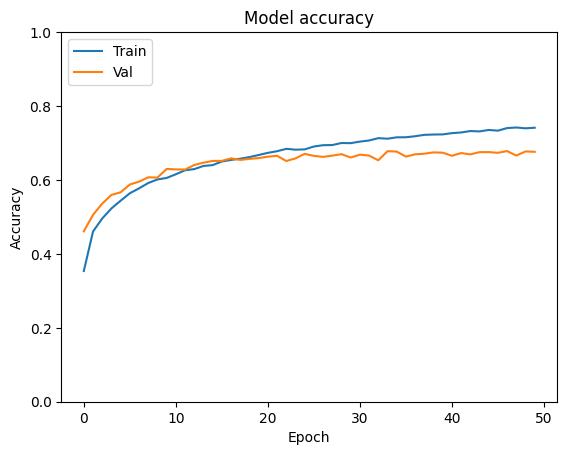

In [16]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.ylim(0, 1)
plt.show()

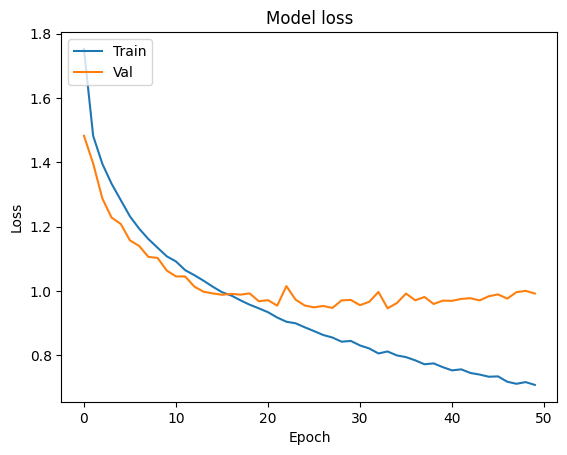

In [17]:
# Plot training and test loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper left') 
plt.show()

## 2. Batch Normalization

In [18]:
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [19]:
# Define the model
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2], X_train.shape[3]))
conv_layer_1 = Conv2D(filters=8, kernel_size=(3, 3), activation='relu')(input_layer)
bn_1 = BatchNormalization()(conv_layer_1)
maxpool_layer_1 = MaxPool2D(pool_size=(2, 2))(bn_1)
conv_layer_2 = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(maxpool_layer_1)
bn_2 = BatchNormalization()(conv_layer_2)
maxpool_layer_2 = MaxPool2D(pool_size=(2, 2))(bn_2)
conv_layer_3 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(maxpool_layer_2)
bn_3 = BatchNormalization()(conv_layer_3)
flatten_layer = Flatten()(bn_3)
dense_layer = Dense(128, activation='relu')(flatten_layer)
dropout = Dropout(rate=0.4)(dense_layer)
output_layer = Dense(10, activation='softmax')(dropout)
model= Model(inputs=input_layer, outputs=output_layer)

In [20]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(),
              metrics=['accuracy'])

In [21]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 6s 8ms/step - loss: 1.7220 - accuracy: 0.3937 - val_loss: 1.9186 - val_accuracy: 0.3476
Epoch 2/20
391/391 [==============================] - 2s 6ms/step - loss: 1.3247 - accuracy: 0.5281 - val_loss: 1.3241 - val_accuracy: 0.5284
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 1.1985 - accuracy: 0.5738 - val_loss: 1.2460 - val_accuracy: 0.5562
Epoch 4/20
391/391 [==============================] - 2s 6ms/step - loss: 1.1094 - accuracy: 0.6068 - val_loss: 1.0426 - val_accuracy: 0.6284
Epoch 5/20
391/391 [==============================] - 2s 6ms/step - loss: 1.0484 - accuracy: 0.6288 - val_loss: 1.0338 - val_accuracy: 0.6340
Epoch 6/20
391/391 [==============================] - 3s 7ms/step - loss: 1.0001 - accuracy: 0.6461 - val_loss: 1.0770 - val_accuracy: 0.6360
Epoch 7/20
391/391 [==============================] - 2s 6ms/step - loss: 0.9582 - accuracy: 0.6621 - val_loss: 1.4233 - val_accuracy: 0.5446
Epoch 

In [22]:
# Compile the model with new learning rate
model= Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01),
              metrics=['accuracy'])

In [23]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=20, batch_size=128,
                    validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 6s 7ms/step - loss: 0.7135 - accuracy: 0.7443 - val_loss: 0.9715 - val_accuracy: 0.6742
Epoch 2/20
391/391 [==============================] - 2s 6ms/step - loss: 0.6922 - accuracy: 0.7505 - val_loss: 1.0442 - val_accuracy: 0.6628
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 0.6854 - accuracy: 0.7543 - val_loss: 0.9892 - val_accuracy: 0.6744
Epoch 4/20
391/391 [==============================] - 3s 7ms/step - loss: 0.6809 - accuracy: 0.7562 - val_loss: 0.9697 - val_accuracy: 0.6772
Epoch 5/20
391/391 [==============================] - 2s 6ms/step - loss: 0.6746 - accuracy: 0.7542 - val_loss: 1.0380 - val_accuracy: 0.6628
Epoch 6/20
391/391 [==============================] - 2s 6ms/step - loss: 0.6646 - accuracy: 0.7592 - val_loss: 1.0127 - val_accuracy: 0.6796
Epoch 7/20
391/391 [==============================] - 2s 6ms/step - loss: 0.6549 - accuracy: 0.7614 - val_loss: 1.0310 - val_accuracy: 0.6760
Epoch 

## 3. Data Augmentation

In [24]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
# Define data generator
train_datagen = ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    rotation_range = 10,
)

In [26]:
# Function to convert a categorical class to its corresponding string
def class_to_string(class_int):
    classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog",
               "horse", "ship", "truck"]
    return classes[class_int]

In [27]:
plt.rcParams['figure.figsize'] = (10,10)  # Configure figure size for 
                                          # appropriate visualization

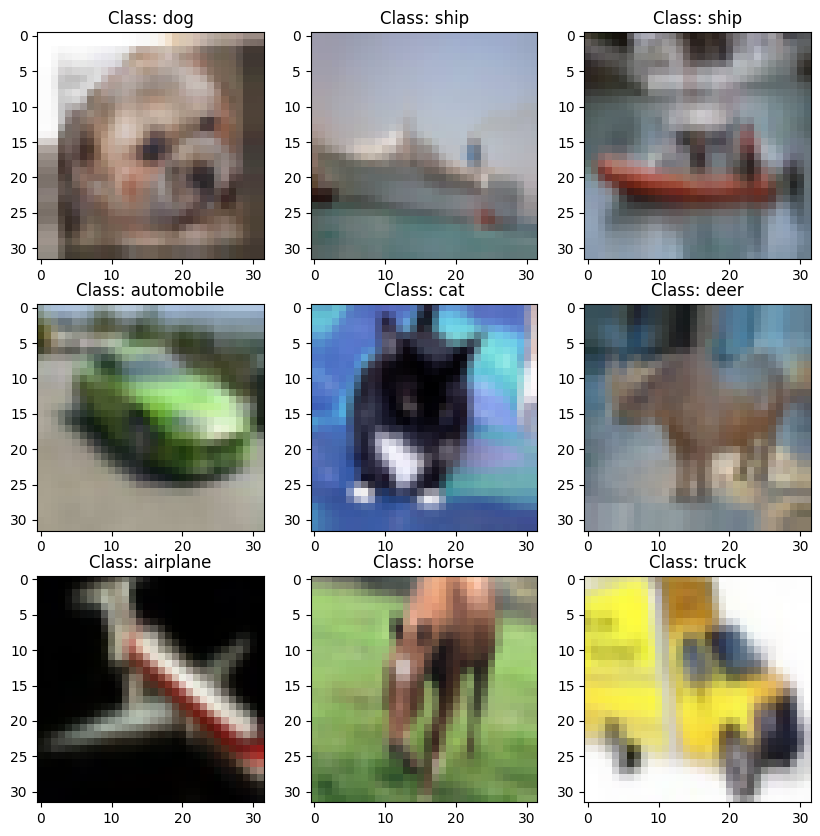

In [28]:
# Show generated data
iterator = train_datagen.flow(X_train_fl, y_train_oh, batch_size=9)
samples, labels = next(iterator)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(samples[i], interpolation='none')
    class_str = class_to_string(np.argmax(labels[i]))
    plt.title("Class: " + class_str)

In [29]:
# Compile the model with new learning rate
model= Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [30]:
# Train the model
batch_size = 100
steps_per_epoch = X_train.shape[0] / batch_size
history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh, 
                                                 batch_size=batch_size), 
                              epochs=20,
                              steps_per_epoch=steps_per_epoch, 
                              validation_data=(X_val, y_val))

Epoch 1/20


<ipython-input-30-2f66e9fe6646>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh,


500/500 [==============================] - 29s 52ms/step - loss: 1.1193 - accuracy: 0.6179 - val_loss: 1.0956 - val_accuracy: 0.6266
Epoch 2/20
500/500 [==============================] - 26s 52ms/step - loss: 1.0671 - accuracy: 0.6284 - val_loss: 1.1059 - val_accuracy: 0.6338
Epoch 3/20
500/500 [==============================] - 26s 52ms/step - loss: 1.0302 - accuracy: 0.6404 - val_loss: 1.0875 - val_accuracy: 0.6428
Epoch 4/20
500/500 [==============================] - 26s 52ms/step - loss: 1.0101 - accuracy: 0.6480 - val_loss: 0.9788 - val_accuracy: 0.6692
Epoch 5/20
500/500 [==============================] - 26s 51ms/step - loss: 1.0010 - accuracy: 0.6530 - val_loss: 0.9171 - val_accuracy: 0.6912
Epoch 6/20
500/500 [==============================] - 25s 50ms/step - loss: 0.9772 - accuracy: 0.6600 - val_loss: 0.9250 - val_accuracy: 0.6790
Epoch 7/20
500/500 [==============================] - 26s 51ms/step - loss: 0.9692 - accuracy: 0.6638 - val_loss: 1.0423 - val_accuracy: 0.6440
Epo

In [31]:
# Train the model
batch_size = 100
steps_per_epoch = X_train.shape[0] / batch_size
history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh, 
                                                 batch_size=batch_size), 
                              epochs=100,
                              steps_per_epoch=steps_per_epoch, 
                              validation_data=(X_val, y_val))

Epoch 1/100
  1/500 [..............................] - ETA: 31s - loss: 0.8422 - accuracy: 0.7100

<ipython-input-31-ffd31a9f8c82>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh,


500/500 [==============================] - 26s 51ms/step - loss: 0.9033 - accuracy: 0.6853 - val_loss: 0.8989 - val_accuracy: 0.6928
Epoch 2/100
500/500 [==============================] - 30s 59ms/step - loss: 0.9038 - accuracy: 0.6836 - val_loss: 0.8910 - val_accuracy: 0.6932
Epoch 3/100
500/500 [==============================] - 28s 57ms/step - loss: 0.9008 - accuracy: 0.6841 - val_loss: 0.8508 - val_accuracy: 0.7112
Epoch 4/100
500/500 [==============================] - 28s 56ms/step - loss: 0.8937 - accuracy: 0.6894 - val_loss: 0.8941 - val_accuracy: 0.7008
Epoch 5/100
500/500 [==============================] - 28s 57ms/step - loss: 0.8952 - accuracy: 0.6874 - val_loss: 0.8060 - val_accuracy: 0.7198
Epoch 6/100
500/500 [==============================] - 29s 58ms/step - loss: 0.8897 - accuracy: 0.6911 - val_loss: 0.8856 - val_accuracy: 0.7034
Epoch 7/100
500/500 [==============================] - 29s 58ms/step - loss: 0.8844 - accuracy: 0.6905 - val_loss: 0.8054 - val_accuracy: 0.71

KeyboardInterrupt: ignored

## 4. Transfer Learning

In [ ]:
# Import dependences for transfer learning
from tensorflow.keras.applications import ResNet50    # arquitectura para hacer redes más profundas, eso es nuestra base del modelo
from keras.models import Sequential
from keras.layers import UpSampling2D
from tensorflow.keras.optimizers import RMSprop

In [ ]:
# Define the model
resnet_model = ResNet50(weights='imagenet',   # se descarga el conocimiento que has sacado por el entrenamiento con imagenet
                        include_top=False,    # quitar el conocimiento que no me sirve = quitar la capa de las clases
                        input_shape=(256, 256, 3))
model = Sequential()
model.add(UpSampling2D((2,2)))    # aumenta el tomanio del imagen para tener la misma resolucion como los imagenes de imagenet (256, 256)
model.add(UpSampling2D((2,2)))    # ya que el modelo va mejor cuanto mas similiar son los datos con el entrenamiento
model.add(UpSampling2D((2,2)))
model.add(resnet_model)           # extaer las caracteristicas
model.add(Flatten())              # transformar a un vector unidimensional

# todos los lineas a partir de eso son opcionales (hay que probar si ayudan o no)
model.add(BatchNormalization())  
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))  

In [ ]:
# Compile the model      (aqui learning rate poquito ya que se esta entrenado bastante con imagenet y no hace falta cambiarlo mucho)
model.compile(optimizer=RMSprop(lr=2e-5), loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# Train the model
history = model.fit(X_train_fl, y_train_oh, epochs=5, batch_size=50, 
                    validation_data=(X_val, y_val))

In [ ]:
# Train the model
batch_size = 20
steps_per_epoch = X_train.shape[0] / batch_size
history = model.fit_generator(train_datagen.flow(X_train_fl, y_train_oh, 
                                                 batch_size=batch_size), 
                              epochs=5,
                              steps_per_epoch=steps_per_epoch, 
                              validation_data=(X_val, y_val))

# Exercise 1: Experiment with other pre-trained models to evaluate results

# Exercise 2: Use the concepts learnt to train a classifier for CIFAR100 dataset